In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import copy
%matplotlib inline

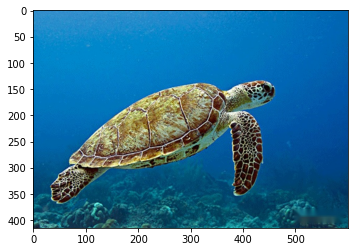

In [37]:
img = cv2.imread("img/turtle.jpg")
plt.imshow(img[:,:,::-1])

In [101]:
# 影像二維畫素轉換為一維
data = img.reshape((-1, 3))
data = np.float32(data)
data.shape

(249000, 3)

In [124]:
centroid = sample(list(data), 2)
print(centroid)
sum((centroid[0] - centroid[1])**2)**0.5

[array([205., 137.,   0.], dtype=float32), array([165.,  87.,   0.], dtype=float32)]


64.03124237432849

In [135]:
def num(x, y):
    return sum((x-y)**2)**0.5

def average(li):
    return sum(li) / len(li)

# d 需為RGB資料
def KMEANS(d, k):
    # init
    kmeans_arr = np.zeros(len(d[:, 0]))
    # K-Means分群結果存放
    kmeans = dict()
    for i in range(k):
        kmeans[i] = list()
    
    # 分群個數必須大於2
    if k <= 1:
        raise Exception("k must more than 2")
    
    # 挑選初始中心點
    centroid = list()
    if len(centroid) == 0:
        centroid = sample(list(d), k)
    
    # 執行演算法
    count = 1
    while True:
        for m, i in enumerate(d):
            compare = list()
            for c in range(k):
                compare.append(num(i, centroid[c]))
            max_index = compare.index(min(compare))
            kmeans[max_index].append(i)
            # 將原本資料矩陣變為聚類形式
            kmeans_arr[m] = max_index

        # 重新計算Centroid Mean
        old = copy.copy(centroid)
        error = 0
        for i in range(k):
            centroid[i] = average(kmeans[i])
            error += num(old[i], centroid[i])
        
        count += 1
        # 計算新中心點跟舊中心點的誤差)
        print(f"iter: {count}, centroid= {centroid}, error={error}")
        if error < 0.15:
            break
            
    return kmeans_arr

In [136]:
kmeans_arr = KMEANS(data ,2)

iter: 2, centroid= [array([107.57460809, 111.11905376,  82.70786531]), array([166.30649214, 102.70897273,   2.80835736])], error=92.81622708275695
iter: 3, centroid= [array([100.08043538, 110.76148716,  92.81565689]), array([165.22143028, 103.41822876,   4.32987809])], error=14.586864206132915
iter: 4, centroid= [array([ 96.82461247, 111.07960989,  98.37097824]), array([164.51889987, 103.53402012,   4.92223458])], error=7.37314927749357
iter: 5, centroid= [array([ 94.97220595, 111.45354072, 101.94126587]), array([164.05566292, 103.53558732,   5.24848946])], error=4.606175589311402
iter: 6, centroid= [array([ 93.77296328, 111.78967676, 104.44436622]), array([163.73167079, 103.52340372,   5.45721131])], error=3.1814287711169134
iter: 7, centroid= [array([ 92.93030185, 112.07030733, 106.29743767]), array([163.52944272, 103.50484605,   5.60303668])], error=2.3049335207023463
iter: 8, centroid= [array([ 92.30433906, 112.30986114, 107.7386485 ]), array([163.36897347, 103.3955639 ,   5.712167

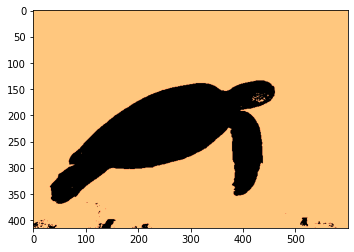

In [137]:
# 生成 K-Means影像
re = kmeans_arr.reshape(img.shape[0], img.shape[1])
plt.imshow(re, 'copper')